In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris(as_frame=True)
X_iris= iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris= iris.target

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["꽃잎 길이 (cm)", "꽃잎 너비(cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True

)

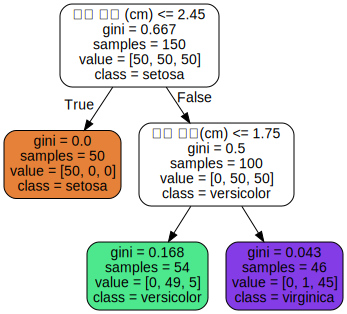

In [ ]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [ ]:
!dot -Tpng "iris_tree.dot" -o "iris_tree.png"

ValueError: x and y must have same first dimension, but have shapes (50,) and (150,)

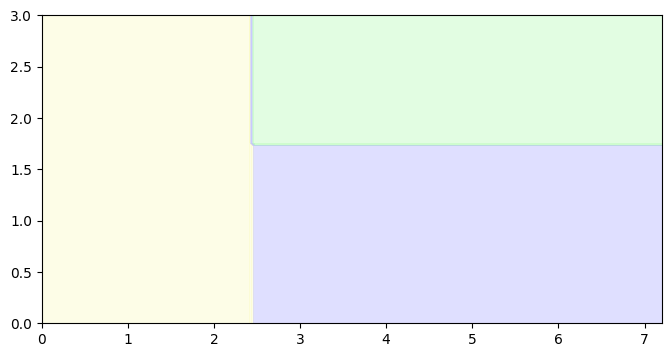

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.figure(figsize=(8,4))

lengths, widths= np.meshgrid(np.linspace(0,7.2, 100), np.linspace(0,3,100))
X_iris_all= np.c_[lengths.ravel(), widths.ravel()]
y_pred= tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name,style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:,0][y_iris==idx], X_iris[:,1],[y_iris==idx],
           style,label=f"Iris {name}")

tree_clf_deeper= DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b= tree_clf_deeper.tree_.threshold[[0,2,3,6]]

plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width (cm)")

plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0- 0.05, 1.0,  "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1+0.02, "Depth=1",verticalalignment="bottom", fontsize=13)
plt.text(th2a+0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0,7.2, 0,3])
plt.legend()

plt.show()

In [ ]:
#9쪽
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

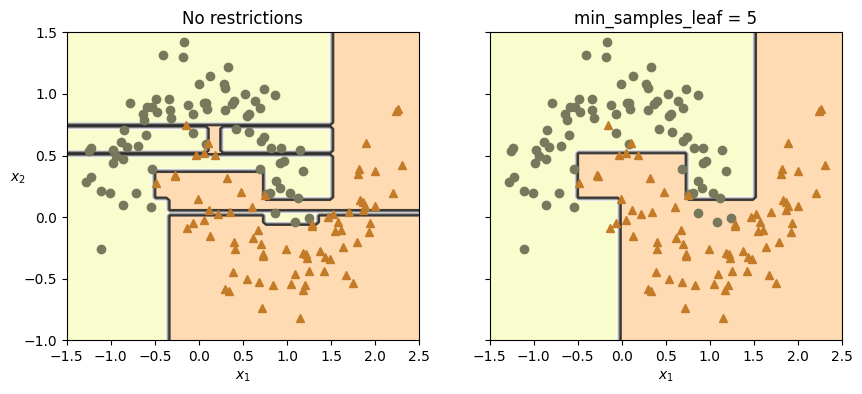

In [ ]:
#16쪽
def plot_decision_boundary(clf,X,y,axes,cmap):
  x1,x2= np.meshgrid(np.linspace(axes[0], axes[1], 100),
                     np.linspace(axes[2], axes[3], 100))
  X_new= np.c_[x1.ravel(), x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1,x2, y_pred, alpha=0.3, cmap=cmap)
  plt.contour(x1,x2,y_pred, cmap="Greys", alpha=0.8)
  colors= {"Wistia": ["#78785c", "#c47b27"], "Pastell": ["red", "blue"]}
  markers= ("o", "^")
  for idx in (0,1):
    plt.plot(X[:,0][y==idx], X[:,1][y==idx],
             color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [ ]:
X_moons_test, y_moons_test= make_moons(n_samples=1000, noise=0.2,
                                       random_state=43)

In [ ]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [ ]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

In [ ]:
#18쪽
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)


DecisionTreeRegressor(max_depth=2, random_state=42)

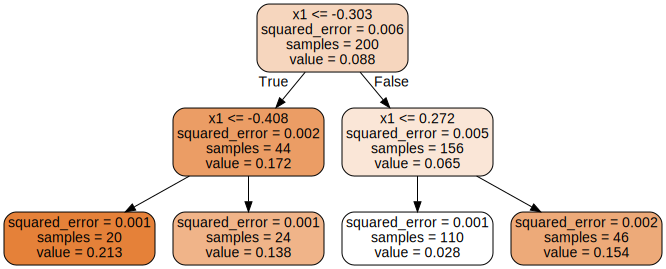

In [ ]:
export_graphviz(
  tree_reg,
  out_file="regression_tree.dot",
  feature_names=["x1"],
  rounded=True,
  filled=True
)
Source.from_file("regression_tree.dot")

In [ ]:
#19쪽
tree_reg2=DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
#20쪽

def plot_regression_predictions(tree_reg,X,y,axes=[-0,5,0,5,-0.05, 0.25]):
  x1= np.linspace(axes[0],axes[1], 500).reshape(-1,1)
  y_pred=tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel("$x_1$")
  plt.plot(X,y,"b.")
  plt.plot(x1,y_pred, "r.-", linewidth=2, label=r"$/\hat{y}$")

fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree .threshold[[0, 1, 4]]
for split, style in ((thO, "k-"), (th1a, "k--"), (th1b, "k--")):
  plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
  plt.text (th0, 0.16, "Depth=0", fontsize=15)
  plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
  plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
  plt.ylabel("$y$", rotation=0)
  plt.legend(loc="upper center", fontsize=16)
  plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)

for split, style in ((thO, "k-"), (thla, "k--"), (th1b, "k--")): o1
  plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
  plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

IndentationError: unexpected indent (<ipython-input-18-3dc18d76fddd>, line 30)

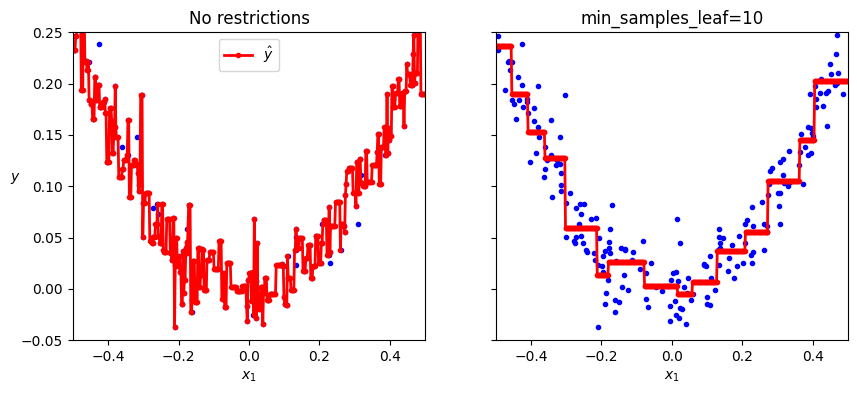

In [ ]:
#23쪽
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42 , min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)
x1 = np.linspace(-0.5, 0.5, 500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots (ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05,0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

In [ ]:
#25쪽
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

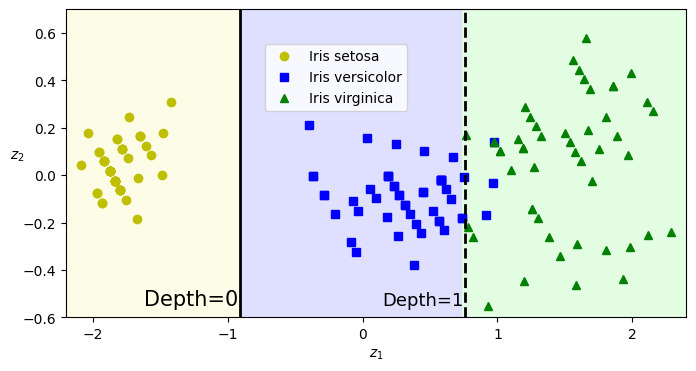

In [ ]:
#26쪽
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                      np.linspace (axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)
plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
  plt.plot(X_iris_rotated[:, 0][y_iris == idx],
          X_iris_rotated[:, 1][y_iris == idx],
          style, label=f"Iris {name}")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
        horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
        horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32,0.67))
plt.show()

AttributeError: taret_names

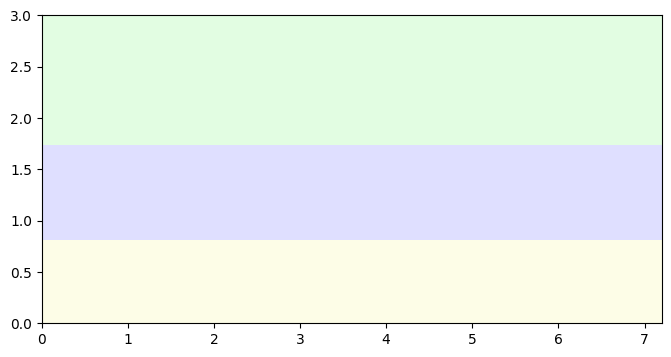

In [ ]:
tree_clf_tweaked= DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

plt.figure(figsize=(8, 4))

y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.taret_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
            style, label=f"Iris {name}")
th0, th1 = tree_clf_tweaked.tree.threshold[[0, 2]]
plt.plot ([0, 7.2], [thO, th0], "k-", linewidth=2)
plt.plot ([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text (1.8, thO + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text (2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

In [ ]:
#연습문제 30쪽
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.4, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [ ]:
#31쪽
from sklearn.model_selection import GridSearchCV
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855